Melbourne housing price prediction Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# Data Preprocessing

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [3]:
df.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
dtype: bool

In [4]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [5]:
# for loop to see unique values
for column in df.columns.values.tolist():
    print(column)
    print(df[column].unique())
    print("")

Suburb
['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'
 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood'
 'Avondale Heights' 'Balaclava' 'Balwyn' 'Balwyn North' 'Bentleigh'
 'Bentleigh East' 'Box Hill' 'Braybrook' 'Brighton' 'Brighton East'
 'Brunswick' 'Brunswick West' 'Bulleen' 'Burwood' 'Camberwell'
 'Canterbury' 'Carlton North' 'Carnegie' 'Caulfield' 'Caulfield North'
 'Caulfield South' 'Chadstone' 'Clifton Hill' 'Coburg' 'Coburg North'
 'Collingwood' 'Doncaster' 'Eaglemont' 'Elsternwick' 'Elwood' 'Essendon'
 'Essendon North' 'Fairfield' 'Fitzroy' 'Fitzroy North' 'Flemington'
 'Footscray' 'Glen Iris' 'Glenroy' 'Gowanbrae' 'Hadfield' 'Hampton'
 'Hampton East' 'Hawthorn' 'Heidelberg Heights' 'Heidelberg West'
 'Hughesdale' 'Ivanhoe' 'Kealba' 'Keilor East' 'Kensington' 'Kew'
 'Kew East' 'Kooyong' 'Maidstone' 'Malvern' 'Malvern East' 'Maribyrnong'
 'Melbourne' 'Middle Park' 'Mont Albert' 'Moonee Ponds' 'Moorabbin'
 'Newport' 'Niddrie' 'North Melbourne' 'Nor

In [6]:
# Looking at data types
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

# Data Cleaning

In [7]:
df.loc[df.Bathroom.isnull(), 'Bathroom']  = df.groupby('Rooms')['Bathroom'].transform(lambda x: x.fillna(x.mean()))
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [8]:
df.loc[df.Car.isnull(), 'Car']  = df.groupby('Type')['Car'].transform(lambda x: x.fillna(x.mean()))
df.loc[df.Landsize.isnull(), 'Landsize']  = df.groupby('Type')['Landsize'].transform(lambda x: x.fillna(x.mean()))

In [9]:
df=df[df.Regionname.notnull()]

In [10]:
df.groupby('Regionname')[['SellerG']].count()

,SellerG
Regionname,
Eastern Metropolitan,4377
Eastern Victoria,228
Northern Metropolitan,9557
Northern Victoria,203
South-Eastern Metropolitan,1739
Southern Metropolitan,11836
Western Metropolitan,6799
Western Victoria,115


In [11]:
df.groupby('Regionname', as_index=False).agg({"Car": "sum"})

,Regionname,Car
0,Eastern Metropolitan,7941.411499
1,Eastern Victoria,466.562269
2,Northern Metropolitan,14933.506910
3,Northern Victoria,439.018473
4,South-Eastern Metropolitan,3366.497001
5,Southern Metropolitan,19436.413692
6,Western Metropolitan,12001.513698
7,Western Victoria,235.548543


In [12]:
df.groupby('Regionname', as_index=False).agg({"Car": "sum",'SellerG': "count",'Rooms':sum})

,Regionname,Car,SellerG,Rooms
0,Eastern Metropolitan,7941.411499,4377,14868
1,Eastern Victoria,466.562269,228,807
2,Northern Metropolitan,14933.506910,9557,26977
3,Northern Victoria,439.018473,203,713
4,South-Eastern Metropolitan,3366.497001,1739,5712
5,Southern Metropolitan,19436.413692,11836,35200
6,Western Metropolitan,12001.513698,6799,20989
7,Western Victoria,235.548543,115,379


In [13]:
df.groupby(['Regionname']).agg({'Rooms':sum, 'SellerG': "count" })

,Rooms,SellerG
Regionname,,
Eastern Metropolitan,14868,4377
Eastern Victoria,807,228
Northern Metropolitan,26977,9557
Northern Victoria,713,203
South-Eastern Metropolitan,5712,1739
Southern Metropolitan,35200,11836
Western Metropolitan,20989,6799
Western Victoria,379,115


In [14]:
df=df[df.Bathroom.notnull()]
df['Bathroom'] = df['Bathroom'].apply(lambda x: round(x))
df['Car'] = df['Car'].apply(lambda x: round(x))

In [15]:
df=df[df.Price.notnull()]
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          6438
Bathroom             0
Car                  0
Landsize             0
BuildingArea     16588
YearBuilt        15160
CouncilArea          0
Lattitude         6251
Longtitude        6251
Regionname           0
Propertycount        0
dtype: int64

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
column = df['Date']
fearure_col = pd.DataFrame({"month":column.dt.month})
df =  pd.concat([df,fearure_col], axis = 1)

In [17]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,month
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,3
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,4
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,4
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,...,1,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,4
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,2,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,4


In [18]:
df = df.drop(['BuildingArea','YearBuilt','Bedroom2','Address','Postcode'], axis = 1)

In [19]:
df.to_csv('data_feature_2.csv', encoding='utf-8', index=False)

In [20]:
df.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Bathroom            0
Car                 0
Landsize            0
CouncilArea         0
Lattitude        6251
Longtitude       6251
Regionname          0
Propertycount       0
month               0
dtype: int64

In [21]:
df.loc[df.Lattitude.isnull(), 'Lattitude']  = df.groupby('Suburb')['Lattitude'].transform(lambda x: x.fillna(x.mean()))
df.loc[df.Longtitude.isnull(), 'Longtitude']  = df.groupby('Suburb')['Longtitude'].transform(lambda x: x.fillna(x.mean()))

In [22]:
df=df.dropna(axis=0, how='any')

In [23]:
df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
month            0
dtype: int64

# Now Data is sucessfully Cleaned.

In [24]:
df['Date']= pd.to_datetime(df['Date'],dayfirst=True)

In [25]:
# Grouping the features by Date
var = df[df['Type']=='h'].sort_values('Date',ascending=False).groupby('Date').std()
count = df[df['Type']=='h'].sort_values('Date',ascending=False).groupby('Date').count()
mean = df[df['Type']=='h'].sort_values('Date',ascending=False).groupby('Date').mean()

In [26]:
mean.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,month
Date,,,,,,,,,,
2016-01-28,3.000000,1.205000e+06,11.200000,1.000000,2.000000,490.000000,-37.836100,145.100600,5457.000000,1.0
2016-03-09,3.201117,1.373916e+06,9.269274,1.564246,1.709497,537.820281,-37.806525,144.989781,6507.905028,3.0
2016-03-12,3.318777,1.446823e+06,9.473362,1.633188,1.703057,540.920996,-37.812252,144.993898,7038.384279,3.0
2016-04-02,3.000000,1.068888e+06,9.835000,1.500000,1.900000,513.940635,-37.806665,144.972249,5679.500000,4.0
2016-04-06,3.341040,1.242345e+06,9.379769,1.653179,1.774566,532.968851,-37.812906,144.989191,6502.075145,4.0


In [27]:
count.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,month
Date,,,,,,,,,,,,,,,,
2016-01-28,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2016-03-09,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179
2016-03-12,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229
2016-04-02,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
2016-04-06,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173


# Data Visualization

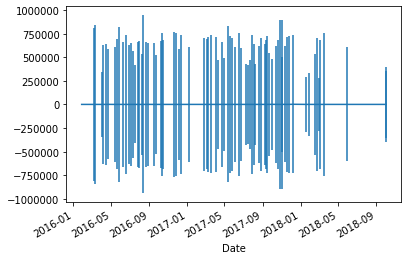

In [28]:
# Plotting average Landsize marked by variance in price
mean["Landsize"].plot(yerr=var["Price"])

Text(0.5, 1.0, 'Lattitude to Longitude for Regionname')

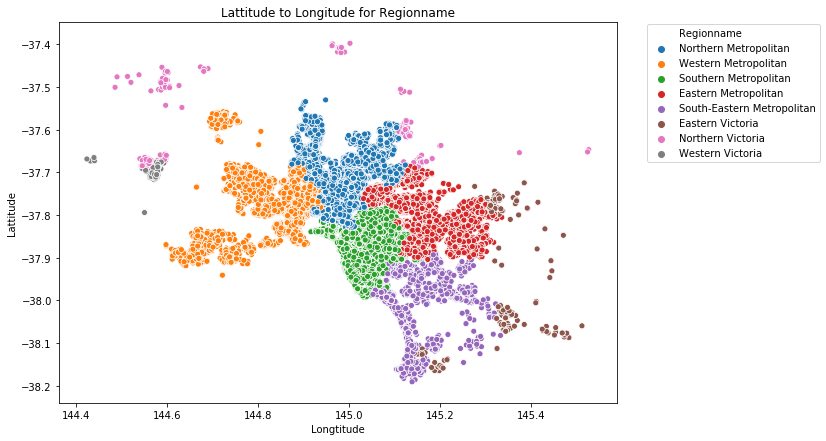

In [29]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(df["Longtitude"], df["Lattitude"], hue=df["Regionname"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.title("Lattitude to Longitude for Regionname")

In [30]:
#Group all the features by Date for the houses of type h and Distance less than 14 kms from CBD.
feature_means = df[(df['Type']=='h')& (df['Distance']<14)].sort_values('Date',ascending=False).groupby('Date').mean()
feature_std = df[(df['Type']=='h') & (df['Distance']<14)].sort_values('Date',ascending=False).groupby('Date').std()

In [31]:
feature_location=df[(df['Type']=='h')&(df['Distance']<14)].sort_values('Date',ascending=False).dropna().groupby(['Suburb']).mean()

In [32]:
#Group all the features by Regionname for the houses of type h and Distance less than 14 kms from CBD.
feature_region_mean=df[(df['Type']=='h')&(df['Distance']<14)].sort_values('Date',ascending=False).dropna().groupby('Regionname').mean()
feature_region_std=df[(df['Type']=='h')&(df['Distance']<14)].sort_values('Date',ascending=False).dropna().groupby('Regionname').std()

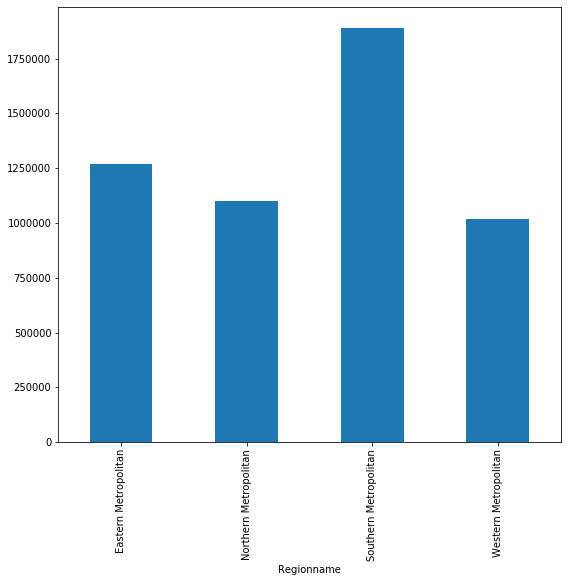

In [33]:
# Plotting the avrega eprice of house sold by Regionname
feature_region_mean['Price'].plot(kind='bar',figsize =(9,8))

In [34]:
# Looking at the average price range in suburb for houses sold in Southern Metropolitan
feature_SouthernM = df[(df['Regionname']=='Southern Metropolitan')& 
                               (df['Type']=='h') & 
                                (df['Distance']<=14)].sort_values('Date',ascending=False).groupby('Suburb').mean()

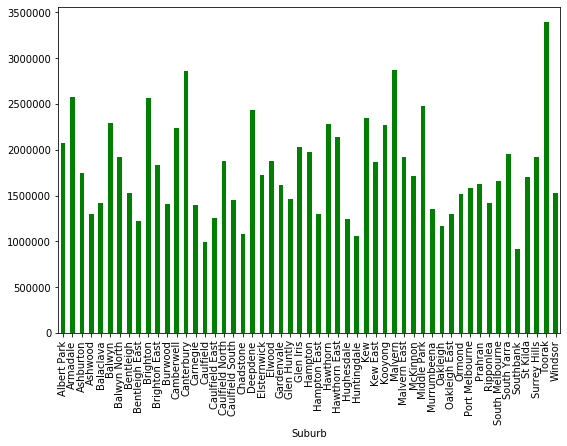

In [35]:
feature_SouthernM['Price'].plot(kind='bar',color = 'g', figsize=(9,6))

In [36]:
#Analyzing Average no. of rooms and Distance for each of the Suburb in Southern Metropolitan Region
feature_South_Suburb = df[(df['Regionname']=='Southern Metropolitan')& 
                               (df['Type']=='h') & 
                                (df['Distance']<=14)].sort_values('Date',ascending=False).groupby('Suburb').agg({'Rooms':'median','Distance':'mean'})

In [37]:
feature_South_Suburb.head()

,Rooms,Distance
Suburb,,
Albert Park,3.0,3.183750
Armadale,3.0,6.300000
Ashburton,3.0,10.709890
Ashwood,3.0,11.264516
Balaclava,3.0,6.466667


In [38]:
#Analyzing Average no. of rooms and Distance for each of the Suburb in Western Metropolitan Region
feature_West_Suburb = df[(df['Regionname']=='Western Metropolitan')& 
                               (df['Type']=='h') & 
                                (df['Distance']<=14)].sort_values('Date',ascending=False).groupby('Suburb').agg({'Rooms':'median','Distance':'mean'})

In [39]:
feature_West_Suburb.head(10)

,Rooms,Distance
Suburb,,
Aberfeldie,4,8.283673
Airport West,3,11.848913
Albanvale,3,14.000000
Albion,3,12.239535
Altona,3,12.421538
Altona North,3,10.432143
Ardeer,3,12.800000
Ascot Vale,3,5.210000
Avondale Heights,3,10.030769


In [40]:
# Looking at the average price range in suburb for houses sold in Western Metropolitan
feature_WesternM = df[(df['Regionname']=='Western Metropolitan')& 
                               (df['Type']=='h') & 
                                (df['Distance']<=14)].sort_values('Date',ascending=False).groupby('Suburb').mean()

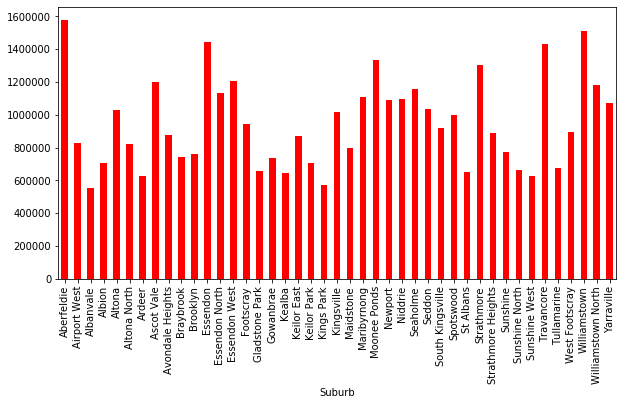

In [41]:
feature_WesternM['Price'].plot(kind='bar', color = 'r', figsize=(10,5))

In [42]:
# Looking at the average price range in suburb for 2 bedroom houses located in the distance of less than 5 kms from CBD sold in Southern Metropolitan 
# Anlyzing the affordable price in the suburbs.
Southern_affordable = df[(df['Regionname']=='Southern Metropolitan')&
                                (df['Rooms']==2)&
                                (df['Type']=='h')&
                                (df['Distance']<=5)].sort_values('Date',ascending=False).groupby('Suburb').mean()

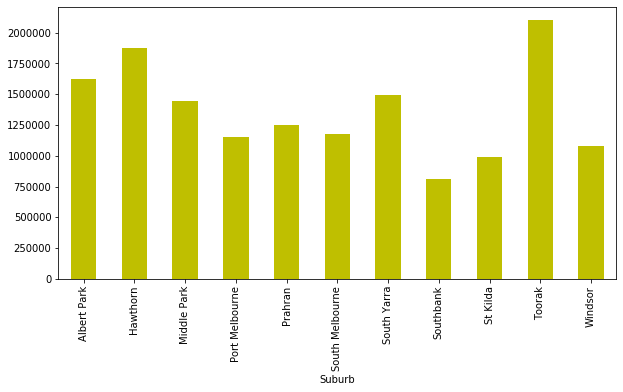

In [43]:
Southern_affordable['Price'].plot(kind='bar',color = 'y', figsize=(10,5))

In [44]:
# Looking at the average price range in suburb for 2 bedroom houses located in the distance of less than 5 kms from CBD sold in Southern Metropolitan 
# Anlyzing the affordable price in the suburbs.
Western_affordable = df[(df['Regionname']=='Western Metropolitan')&
                                (df['Rooms']==2)&
                                (df['Type']=='h')&
                                (df['Distance']<=6)].sort_values('Date',ascending=False).groupby('Suburb').mean()

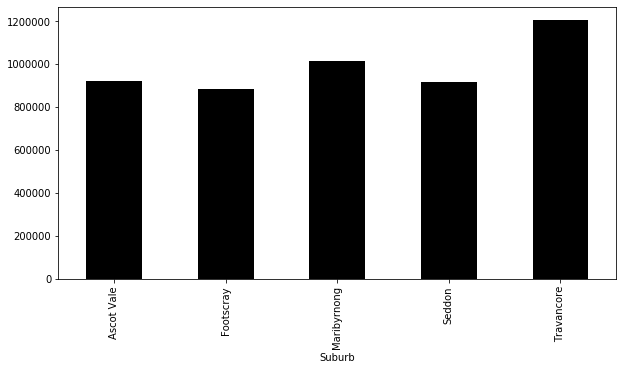

In [45]:
Western_affordable['Price'].plot(kind='bar', color = 'black', figsize=(10,5))

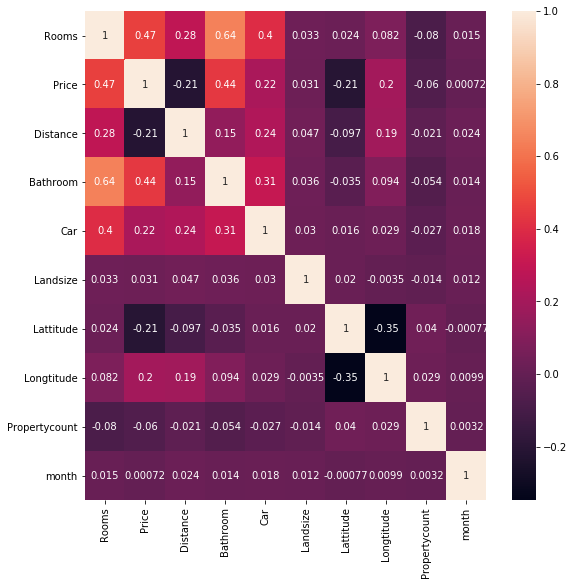

In [47]:
# Plotting the heatmap to understand the features correlation
fig,ax = plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)

In [48]:
#Drop Null values from dataframe
dataframe_Housing = df.dropna().sort_values('Date')

In [49]:
# Convert the date column to number of days from the date when the house is sold
from datetime import date
days_since_start = [(x-dataframe_Housing['Date'].min()).days for x in dataframe_Housing['Date']]
dataframe_Housing['Days']= days_since_start

In [50]:
# Dropping columns which has less correlation to target variable(Price)
df_Housing=dataframe_Housing.drop(['Date','SellerG','Landsize','Propertycount'],axis=1)

In [51]:
# understanding the dattyoes from the Housing data frame
df_Housing.dtypes

Suburb          object
Rooms            int64
Type            object
Price          float64
Method          object
Distance       float64
Bathroom         int64
Car              int64
CouncilArea     object
Lattitude      float64
Longtitude     float64
Regionname      object
month            int64
Days             int64
dtype: object

In [52]:
df_Housing['CouncilArea'].value_counts()

Boroondara City Council           2520
Darebin City Council              2349
Moreland City Council             1790
Glen Eira City Council            1643
Moonee Valley City Council        1584
Melbourne City Council            1502
Banyule City Council              1392
Brimbank City Council             1366
Bayside City Council              1311
Maribyrnong City Council          1221
Hume City Council                 1036
Monash City Council               1007
Port Phillip City Council          952
Yarra City Council                 918
Stonnington City Council           884
Manningham City Council            842
Hobsons Bay City Council           799
Kingston City Council              735
Whittlesea City Council            709
Wyndham City Council               492
Whitehorse City Council            435
Maroondah City Council             355
Knox City Council                  287
Melton City Council                243
Frankston City Council             229
Greater Dandenong City Co

In [53]:
# Convertig Object columns to dummies
df_dummies = pd.get_dummies(df_Housing[['Type','Method','CouncilArea','Regionname']])

In [54]:
df_Housing.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance', 'Bathroom',
       'Car', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'month',
       'Days'],
      dtype='object')

In [55]:
#Dropping the old columns which have been converted to dummies and creating a new dataframe
df_Housing.drop(['Suburb','Type','Method','CouncilArea','Regionname'],axis=1,inplace=True)
df_Housing=df_Housing.join(df_dummies)

In [56]:
df_Housing.head(5)

,Rooms,Price,Distance,Bathroom,Car,Lattitude,Longtitude,month,Days,Type_h,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
10127,2,813000.0,11.2,1,2,-37.827600,145.102300,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10128,3,1205000.0,11.2,1,2,-37.836100,145.100600,1,0,1,...,0,0,0,0,0,0,0,1,0,0
6828,3,670000.0,6.9,2,2,-37.767200,144.920900,3,41,0,...,0,0,0,0,0,0,0,0,1,0
7138,3,780000.0,11.2,2,2,-37.735300,144.890700,3,41,1,...,0,0,0,0,0,0,0,0,1,0
7139,3,950000.0,11.2,1,2,-37.739833,144.885661,3,41,1,...,0,0,0,0,0,0,0,0,1,0


In [57]:
# Splitting indepnedent and dependent features into X and y
from sklearn.model_selection import train_test_split
X= df_Housing.drop(['Price'],axis=1)
y= df_Housing['Price']

In [58]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

In [59]:
# Train the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
# Predict
# Predicting test set results
y_pred = lm.predict(X_test)
y_pred

array([ 770174.01611125,  825047.29284684,  896280.75011817, ...,
        219998.25658668, 1159630.66866025,  652935.94235966])

In [61]:
lm.score(X_test, y_test)

0.6115995899335278

# Linear Regression score is 61.1 %

In [62]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 254937.49935748827
MSE: 155145381706.91653
RMSE: 393884.98537887493


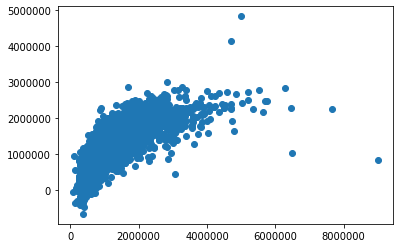

In [63]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)

In [64]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA

In [65]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(weights='distance', n_neighbors=200)
knr.fit(X_train, y_train)
print("KNN Score: ", knr.score(X_train, y_train))

KNN Score:  0.9989176483799889


# KNN Score is 99.8 %.

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [67]:
#using decision tree model
from sklearn.tree import DecisionTreeRegressor as dt
model = dt()
model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [68]:
# create prediction
dt_pred = model.predict(X_test)
dt_pred[0:5]

array([ 389000., 1667000.,  505700.,  750000.,  902000.])

In [69]:
# look at the accuracy score
print("Decision tree regressor: ", model.score(X_test, y_test))

Decision tree regressor:  0.9967943828952076


# Decission Tree Regressor score is 99.6 %.

In [70]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [71]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
       Rooms  Distance  Bathroom  Car  Lattitude  Longtitude  month  Days  \
10127      2      11.2         1    2 -37.827600  145.102300      1     0   
10128      3      11.2         1    2 -37.836100  145.100600      1     0   
6828       3       6.9         2    2 -37.767200  144.920900      3    41   
7138       3      11.2         2    2 -37.735300  144.890700      3    41   
7139       3      11.2         1    2 -37.739833  144.885661      3    41   

       Type_h  Type_t  ...  CouncilArea_Yarra City Council  \
10127       0       0  ...                               0   
10128       1       0  ...                               0   
6828        0       0  ...                               0   
7138        1       0  ...                               0   
7139        1       0  ...                               0   

       CouncilArea_Yarra Ranges Shire Council  \
10127                                       0   
10128              